# Magic Dataset

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique.
It's a binary classification problem, essentially.

You can find more about it here: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names = cols)

In [3]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
df['class'] = (df['class'] == 'g').astype(int)

In [5]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


The first 10 columns are the features of this dataset and the last column is the label.
This is a supervised learning problem.

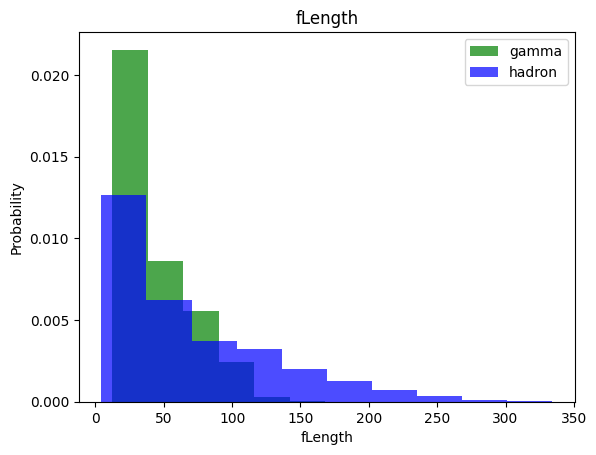

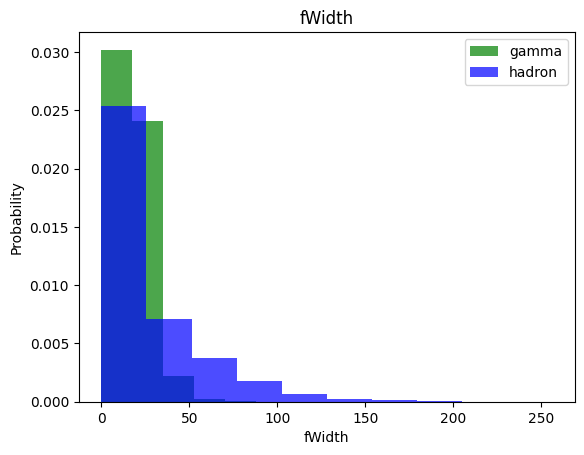

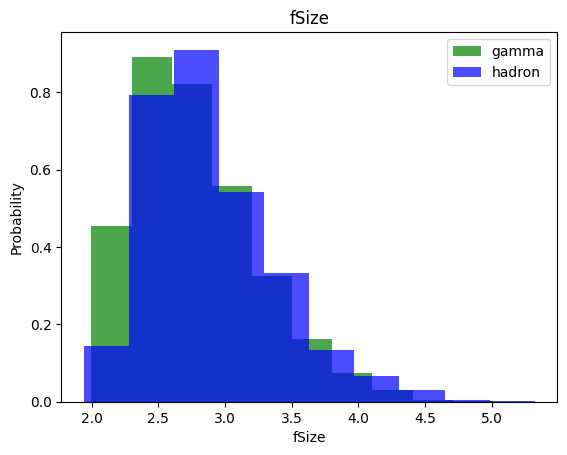

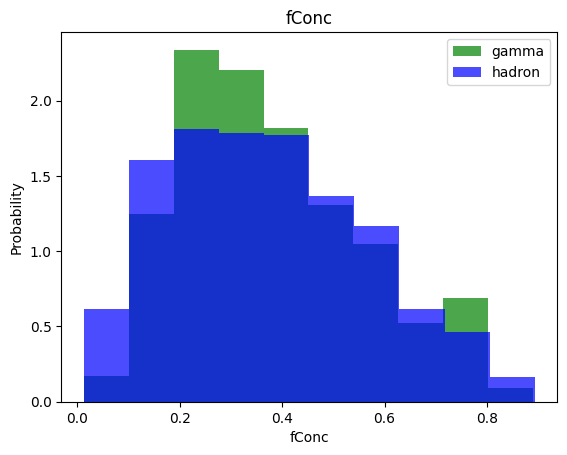

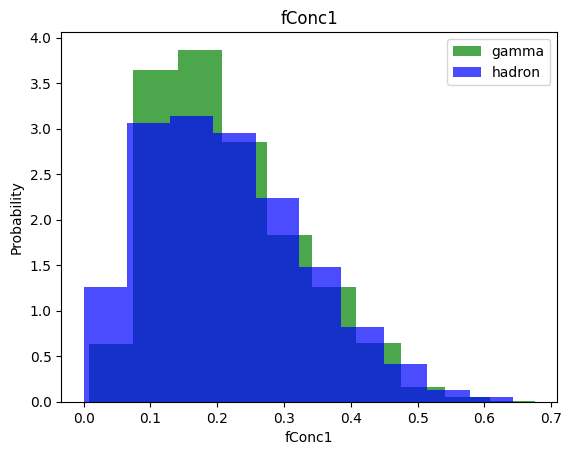

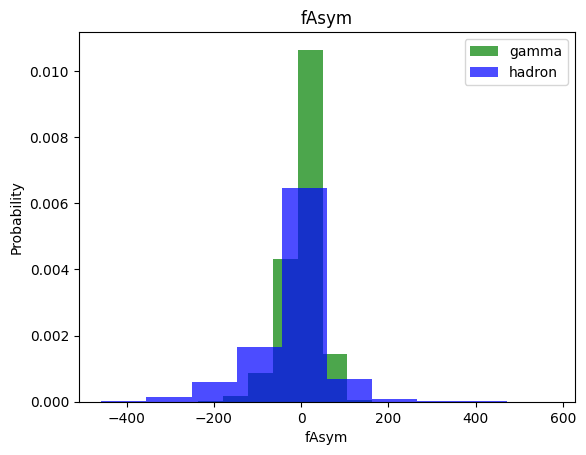

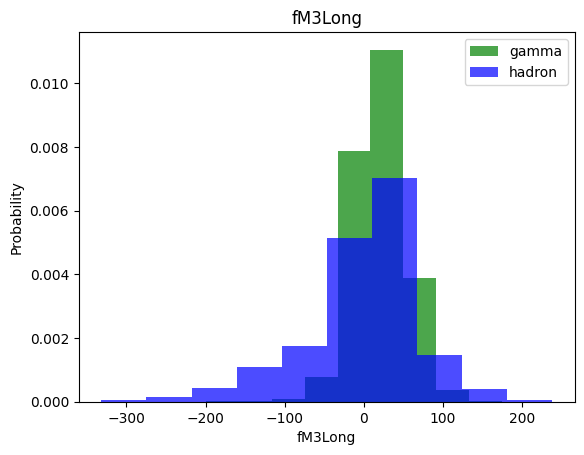

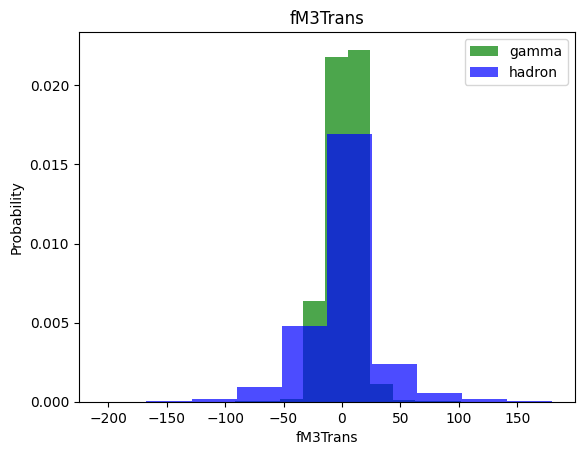

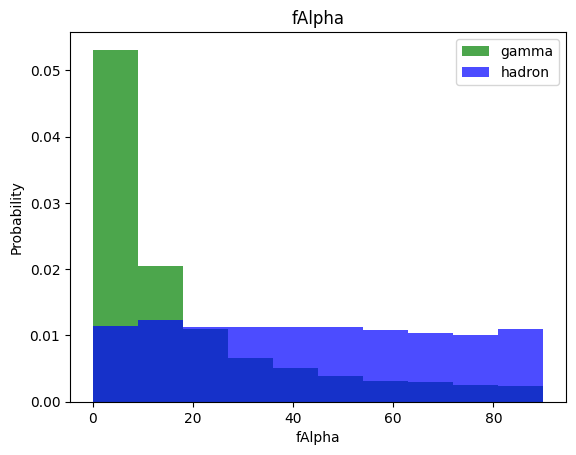

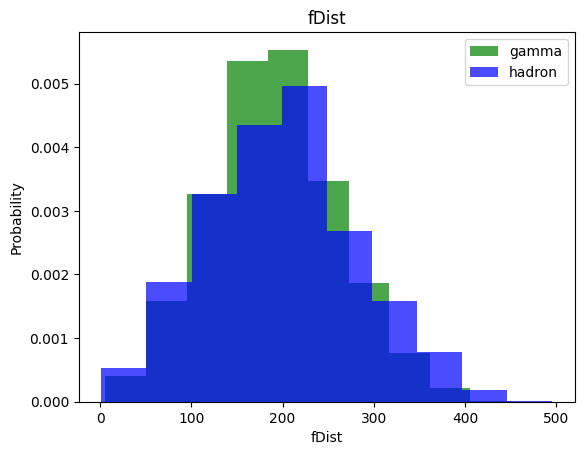

In [6]:
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], color = 'green', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df['class'] == 0][label], color = 'blue', label = 'hadron', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Now we split the data for the learnign process.

We can use np.split instead of train_test_split, so that we split the data into train, validation and test data. The train data would be 60% of the dataframe, the rest 20% would be the validation data and the last 20% would be the test data.

In [7]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

As we saw from the dataframe and the histograms, the values vary in some columns. So we can scale them, to better our results.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

The data is imbalanced. The gamma label has 7000 datapoints and the hadron label has 3000 datapoints. We need to fix that.

In the case of imbalanced dataset, for the accuracy of the model, we need to check the f1-scores, not the accuracy.

In [10]:
from imblearn.over_sampling import RandomOverSampler

In [11]:
train, X_train, y_train = scale_dataset(train, oversample=True)
val, X_val, y_val = scale_dataset(val, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
model_knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = model_knn.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1357
           1       0.85      0.87      0.86      2447

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = model_nb.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1357
           1       0.73      0.89      0.80      2447

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = model_lg.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1357
           1       0.84      0.82      0.83      2447

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# SMVs

In [25]:
from sklearn.svm import SVC

In [26]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [27]:
y_pred = model_svm.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1357
           1       0.89      0.89      0.89      2447

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network!

In [29]:
import tensorflow as tf

In [30]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape = (10,)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics = ['accuracy'])

In [31]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [32]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
372/372 [==============================] - 0s 914us/step - loss: 0.4324 - accuracy: 0.8092 - val_loss: 0.6040 - val_accuracy: 0.6742
Epoch 2/10
372/372 [==============================] - 0s 636us/step - loss: 0.3625 - accuracy: 0.8486 - val_loss: 0.5500 - val_accuracy: 0.7169
Epoch 3/10
372/372 [==============================] - 0s 619us/step - loss: 0.3463 - accuracy: 0.8558 - val_loss: 0.5075 - val_accuracy: 0.7472
Epoch 4/10
372/372 [==============================] - 0s 636us/step - loss: 0.3393 - accuracy: 0.8596 - val_loss: 0.4666 - val_accuracy: 0.7681
Epoch 5/10
372/372 [==============================] - 0s 634us/step - loss: 0.3330 - accuracy: 0.8608 - val_loss: 0.5820 - val_accuracy: 0.7028
Epoch 6/10
372/372 [==============================] - 0s 711us/step - loss: 0.3286 - accuracy: 0.8607 - val_loss: 0.4934 - val_accuracy: 0.7402
Epoch 7/10
372/372 [==============================] - 0s 632us/step - loss: 0.3239 - accuracy: 0.8658 - val_loss: 0.5421 - val_accuracy:

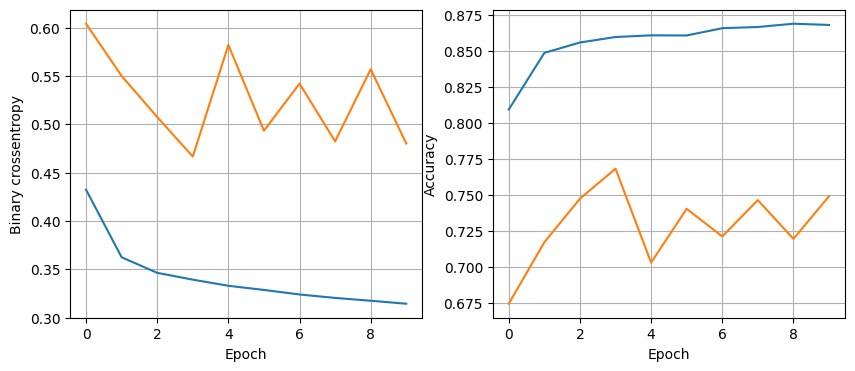

In [33]:
plot_history(history)

But we can do better. Optimize it!

In [34]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )

    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


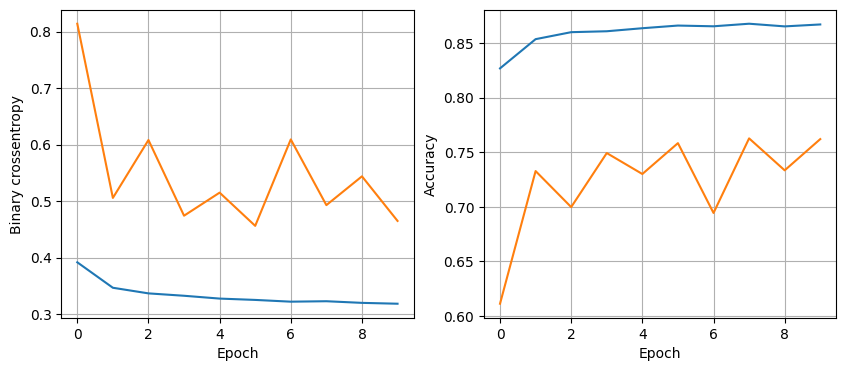

119/119 [==============================] - 0s 379us/step - loss: 0.3151 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.01, batch size 64


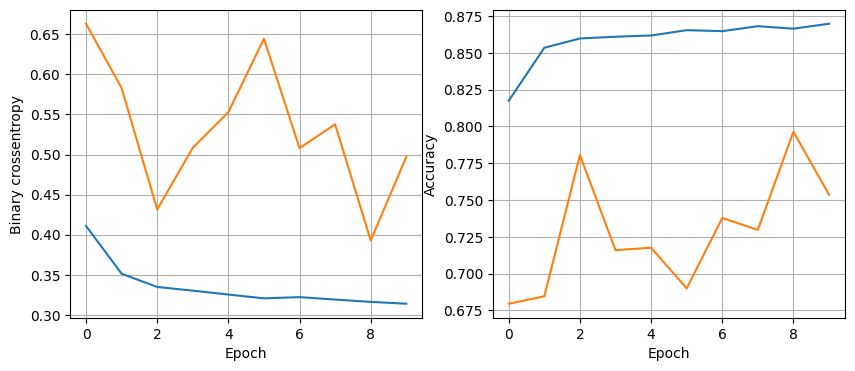

119/119 [==============================] - 0s 375us/step - loss: 0.3099 - accuracy: 0.8715
16 nodes, dropout 0, lr 0.01, batch size 128


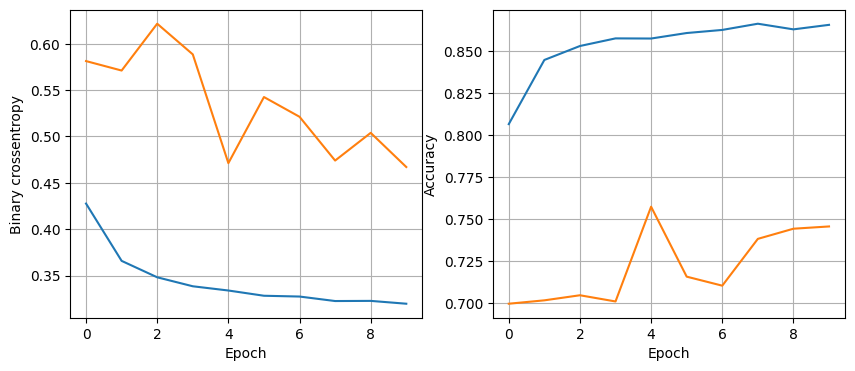

119/119 [==============================] - 0s 366us/step - loss: 0.3190 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.005, batch size 32


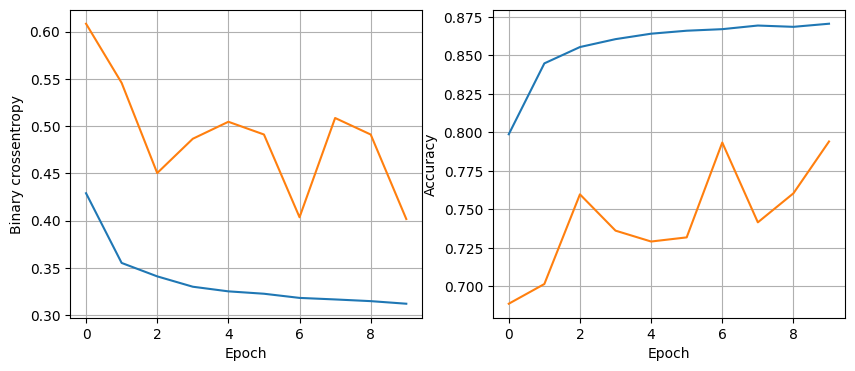

119/119 [==============================] - 0s 354us/step - loss: 0.3256 - accuracy: 0.8667
16 nodes, dropout 0, lr 0.005, batch size 64


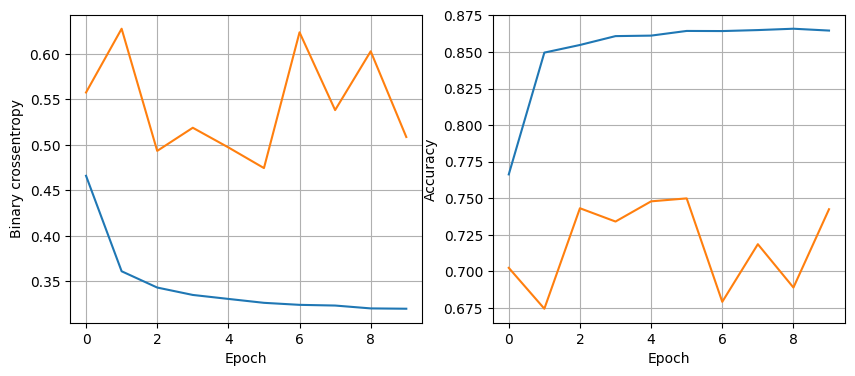

119/119 [==============================] - 0s 362us/step - loss: 0.3101 - accuracy: 0.8715
16 nodes, dropout 0, lr 0.005, batch size 128


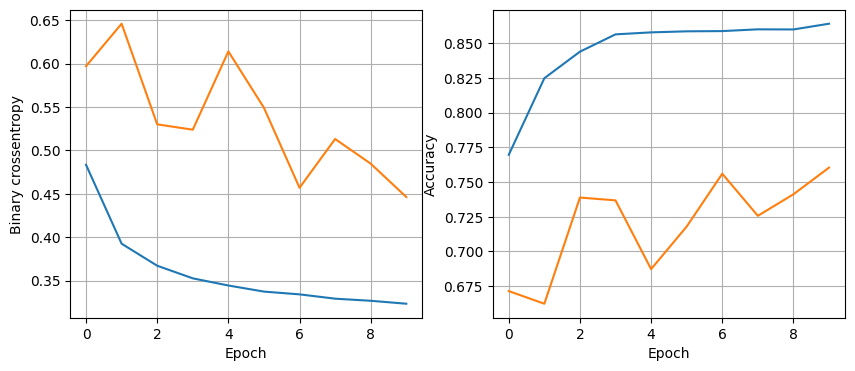

119/119 [==============================] - 0s 505us/step - loss: 0.3188 - accuracy: 0.8725
16 nodes, dropout 0, lr 0.001, batch size 32


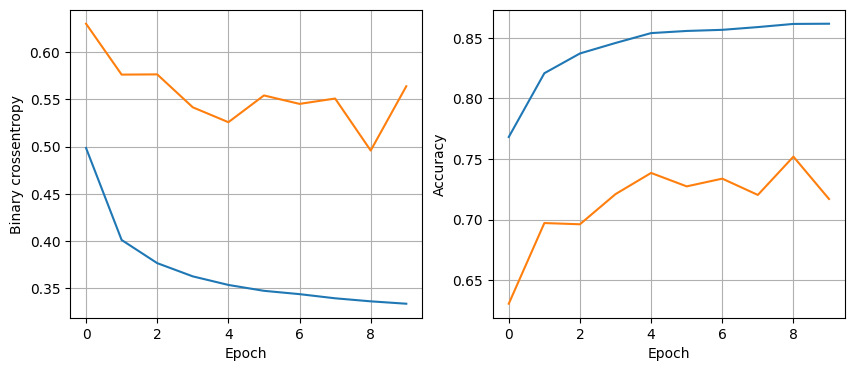

119/119 [==============================] - 0s 408us/step - loss: 0.3264 - accuracy: 0.8670
16 nodes, dropout 0, lr 0.001, batch size 64


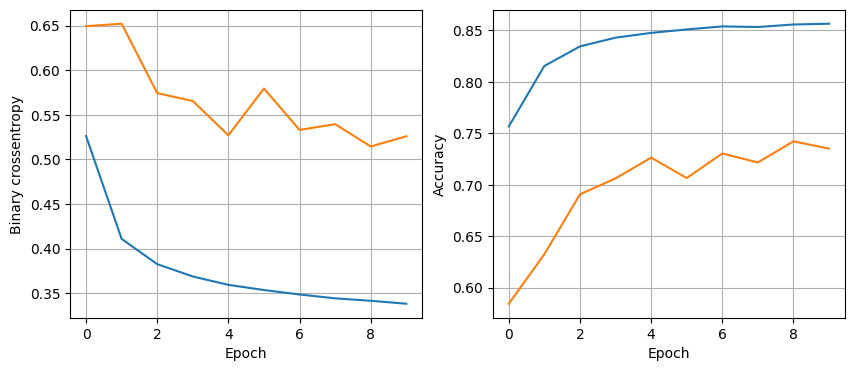

119/119 [==============================] - 0s 366us/step - loss: 0.3289 - accuracy: 0.8646
16 nodes, dropout 0, lr 0.001, batch size 128


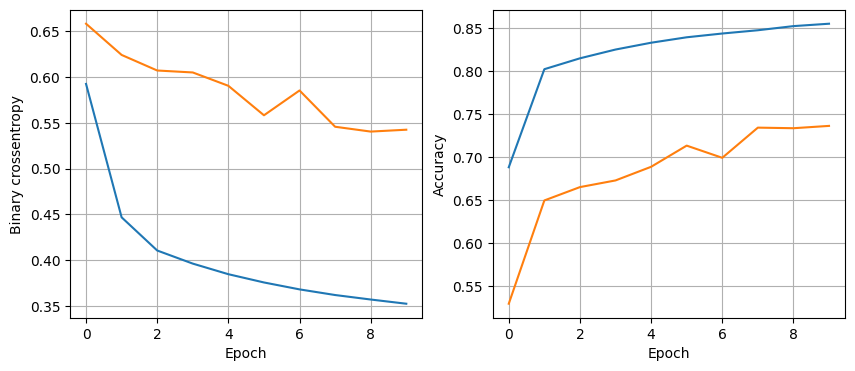

119/119 [==============================] - 0s 375us/step - loss: 0.3462 - accuracy: 0.8546
16 nodes, dropout 0.2, lr 0.01, batch size 32


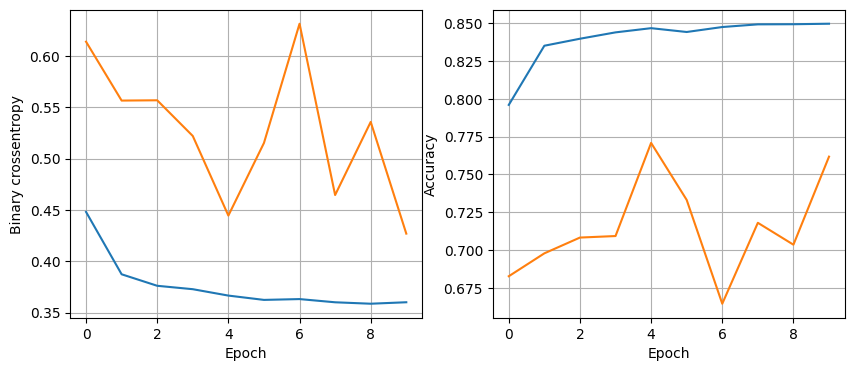

119/119 [==============================] - 0s 353us/step - loss: 0.3247 - accuracy: 0.8636
16 nodes, dropout 0.2, lr 0.01, batch size 64


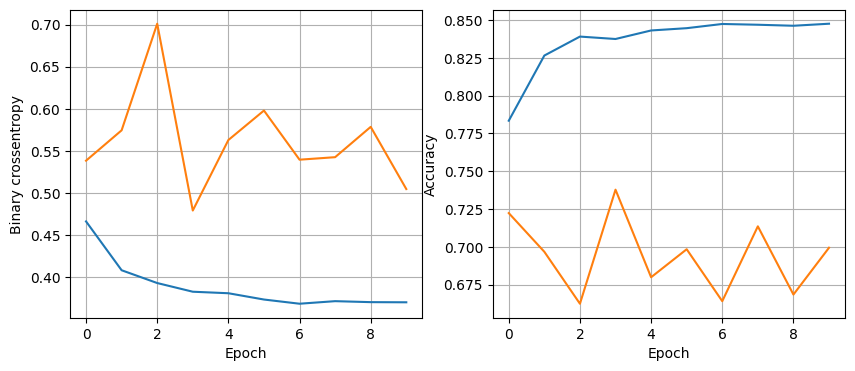

119/119 [==============================] - 0s 370us/step - loss: 0.3424 - accuracy: 0.8596
16 nodes, dropout 0.2, lr 0.01, batch size 128


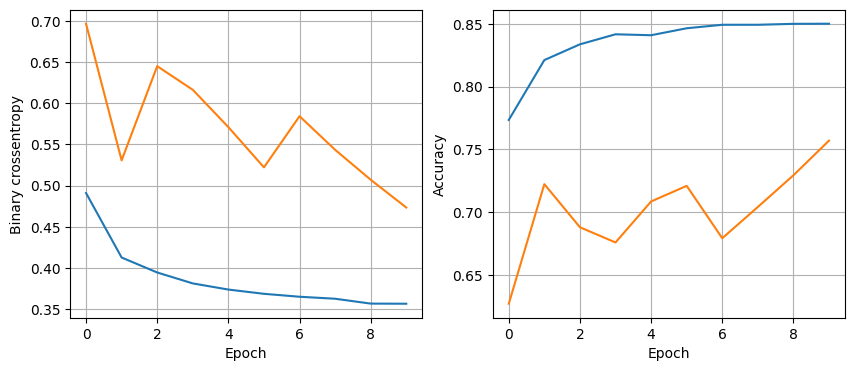

119/119 [==============================] - 0s 354us/step - loss: 0.3266 - accuracy: 0.8649
16 nodes, dropout 0.2, lr 0.005, batch size 32


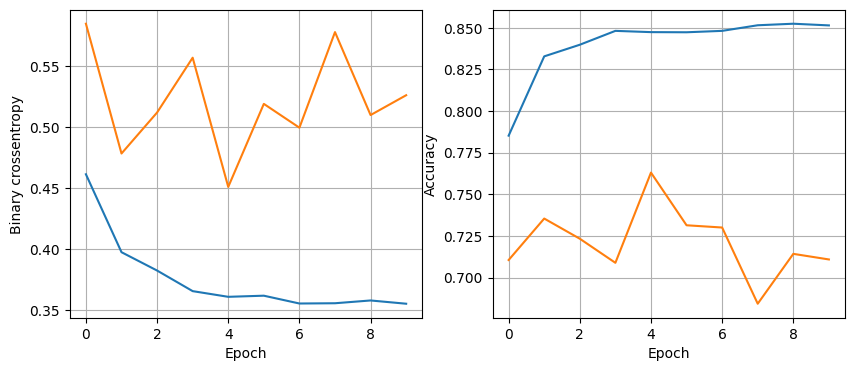

119/119 [==============================] - 0s 370us/step - loss: 0.3279 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.005, batch size 64


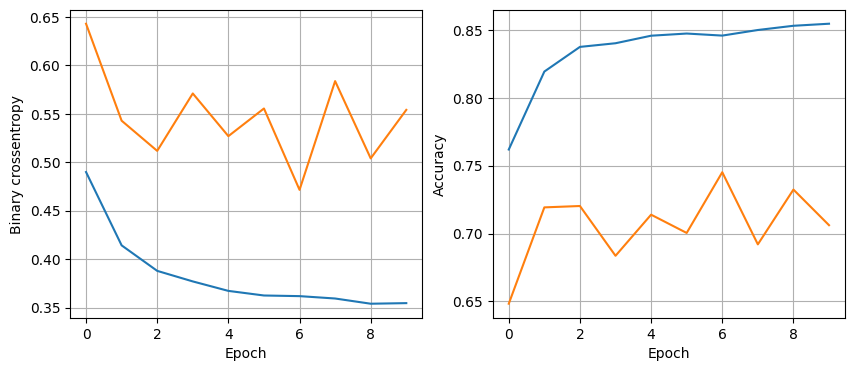

119/119 [==============================] - 0s 370us/step - loss: 0.3219 - accuracy: 0.8651
16 nodes, dropout 0.2, lr 0.005, batch size 128


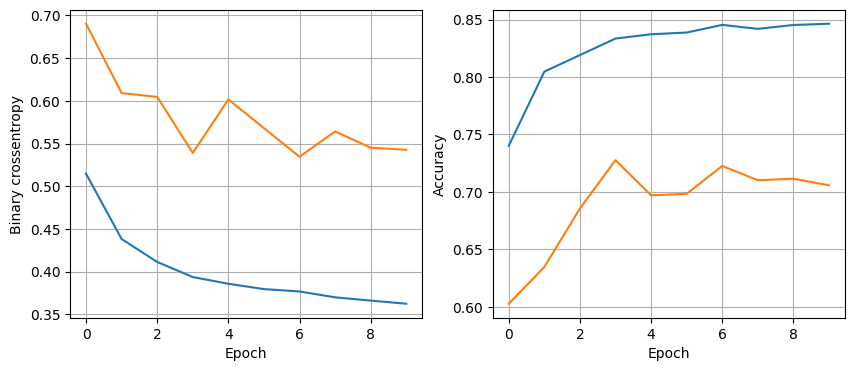

119/119 [==============================] - 0s 375us/step - loss: 0.3303 - accuracy: 0.8649
16 nodes, dropout 0.2, lr 0.001, batch size 32


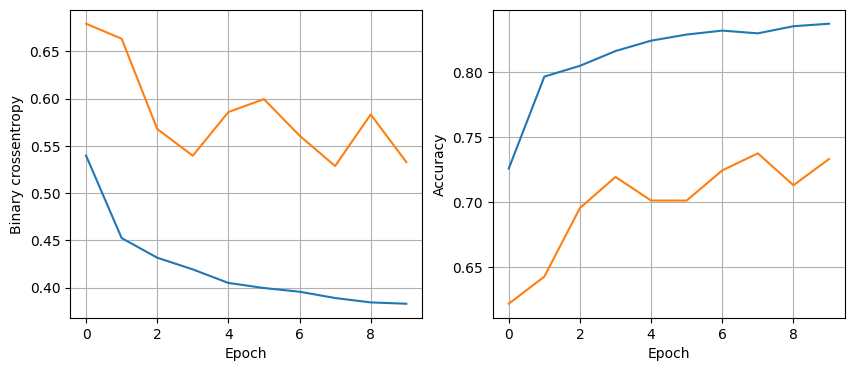

119/119 [==============================] - 0s 366us/step - loss: 0.3434 - accuracy: 0.8609
16 nodes, dropout 0.2, lr 0.001, batch size 64


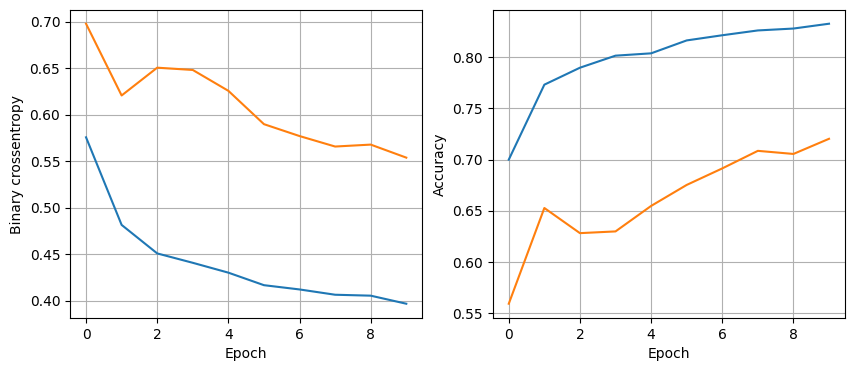

119/119 [==============================] - 0s 362us/step - loss: 0.3592 - accuracy: 0.8520
16 nodes, dropout 0.2, lr 0.001, batch size 128


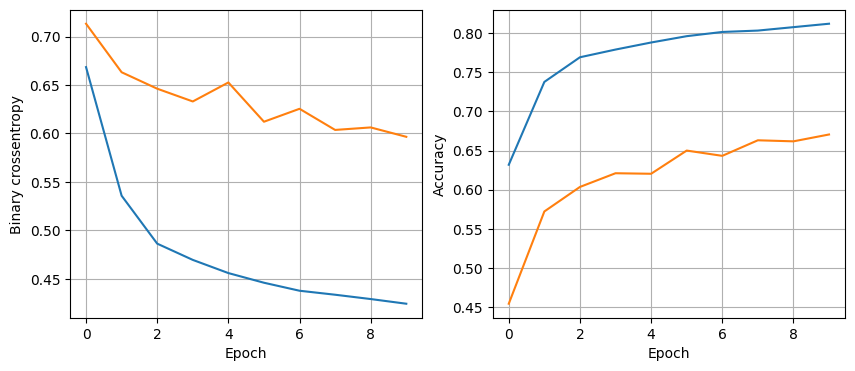

119/119 [==============================] - 0s 375us/step - loss: 0.3835 - accuracy: 0.8318
32 nodes, dropout 0, lr 0.01, batch size 32


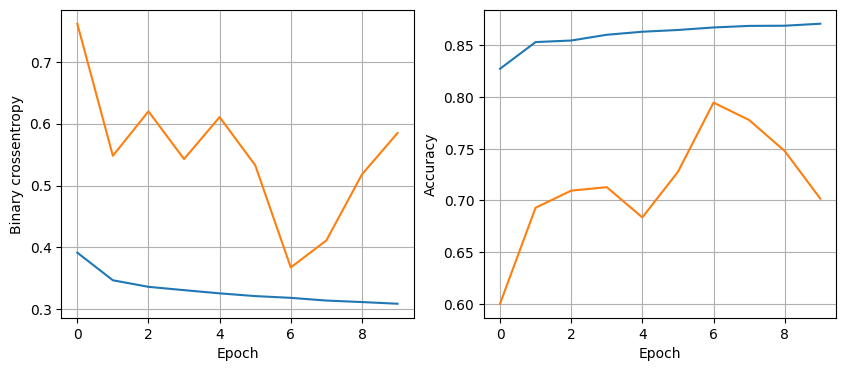

119/119 [==============================] - 0s 370us/step - loss: 0.3119 - accuracy: 0.8693
32 nodes, dropout 0, lr 0.01, batch size 64


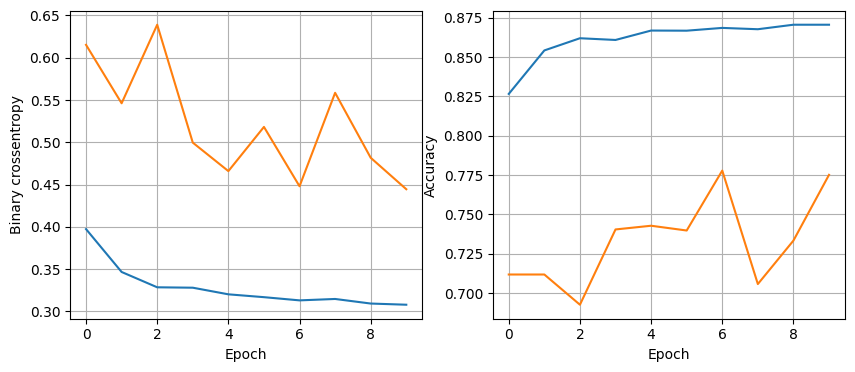

119/119 [==============================] - 0s 396us/step - loss: 0.3140 - accuracy: 0.8720
32 nodes, dropout 0, lr 0.01, batch size 128


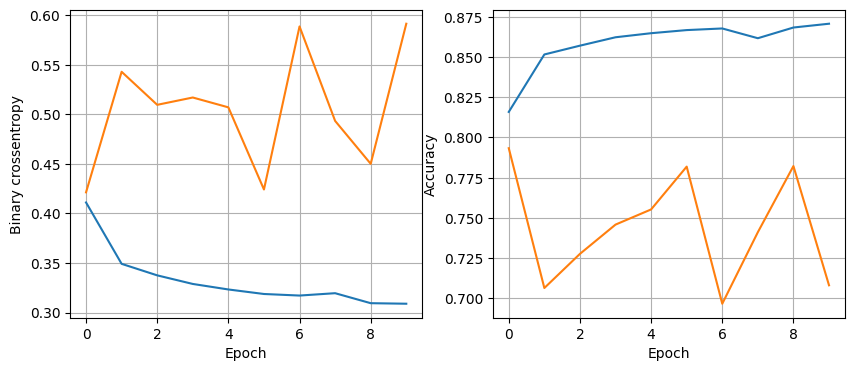

119/119 [==============================] - 0s 370us/step - loss: 0.3121 - accuracy: 0.8678
32 nodes, dropout 0, lr 0.005, batch size 32


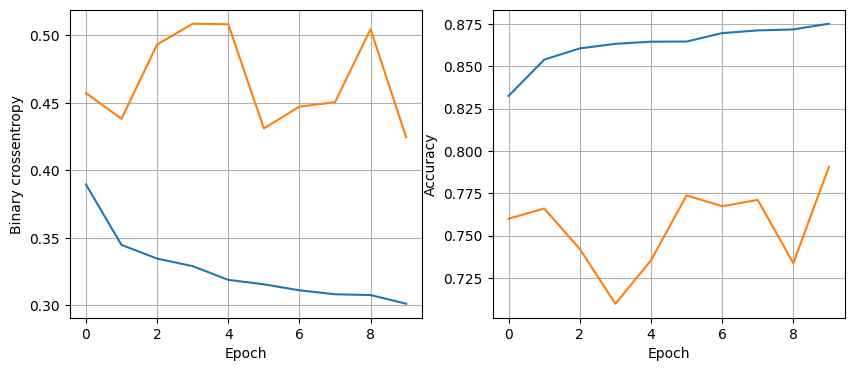

119/119 [==============================] - 0s 383us/step - loss: 0.3147 - accuracy: 0.8638
32 nodes, dropout 0, lr 0.005, batch size 64


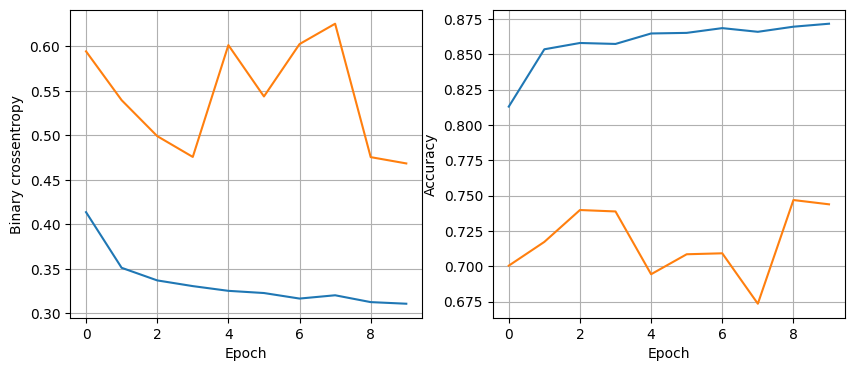

119/119 [==============================] - 0s 417us/step - loss: 0.3086 - accuracy: 0.8751
32 nodes, dropout 0, lr 0.005, batch size 128


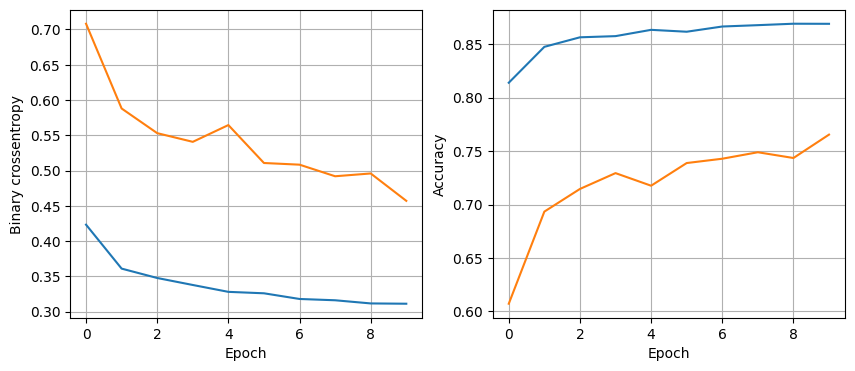

119/119 [==============================] - 0s 362us/step - loss: 0.3103 - accuracy: 0.8770
32 nodes, dropout 0, lr 0.001, batch size 32


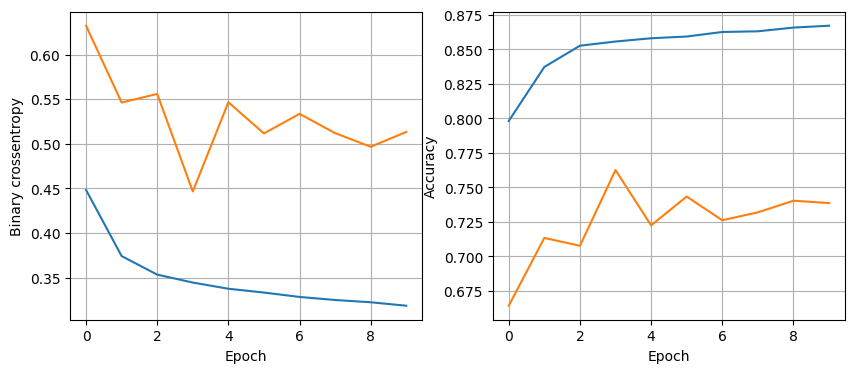

119/119 [==============================] - 0s 371us/step - loss: 0.3132 - accuracy: 0.8707
32 nodes, dropout 0, lr 0.001, batch size 64


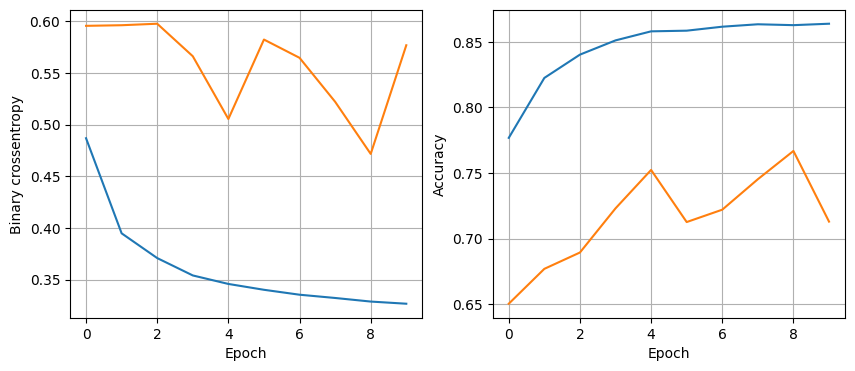

119/119 [==============================] - 0s 387us/step - loss: 0.3219 - accuracy: 0.8699
32 nodes, dropout 0, lr 0.001, batch size 128


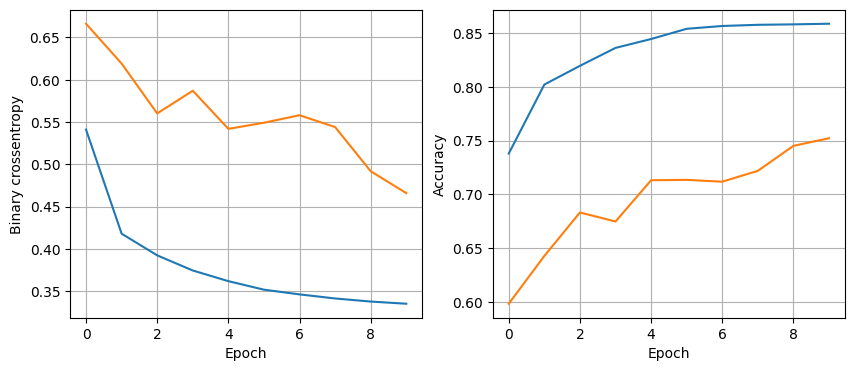

119/119 [==============================] - 0s 362us/step - loss: 0.3304 - accuracy: 0.8646
32 nodes, dropout 0.2, lr 0.01, batch size 32


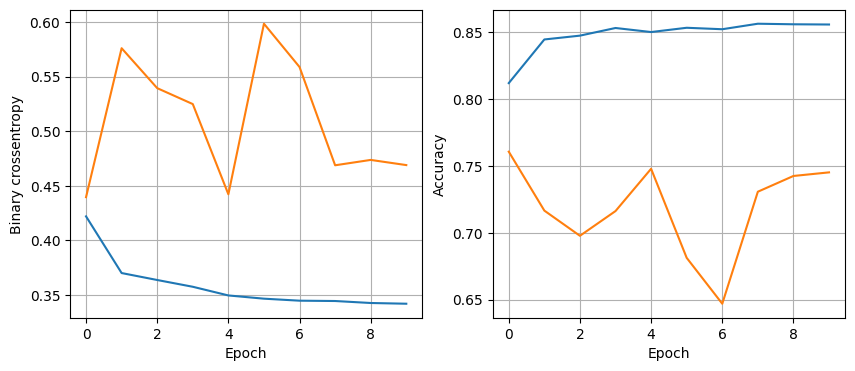

119/119 [==============================] - 0s 366us/step - loss: 0.3193 - accuracy: 0.8678
32 nodes, dropout 0.2, lr 0.01, batch size 64


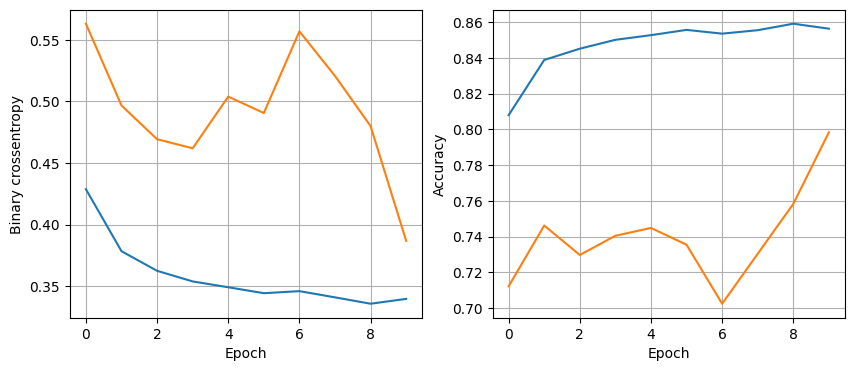

119/119 [==============================] - 0s 375us/step - loss: 0.3261 - accuracy: 0.8601
32 nodes, dropout 0.2, lr 0.01, batch size 128


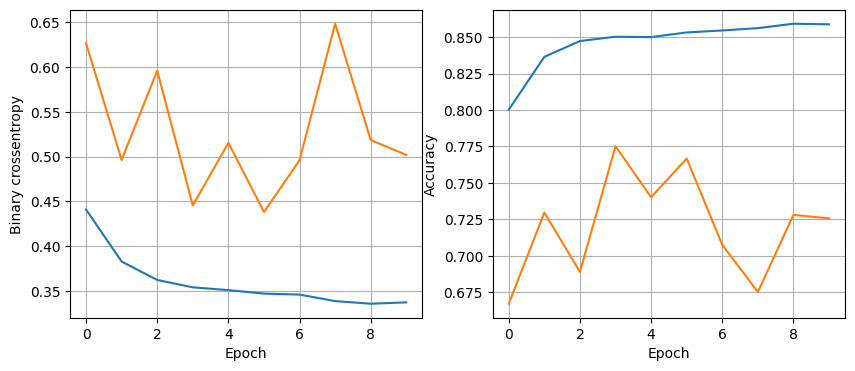

119/119 [==============================] - 0s 375us/step - loss: 0.3090 - accuracy: 0.8741
32 nodes, dropout 0.2, lr 0.005, batch size 32


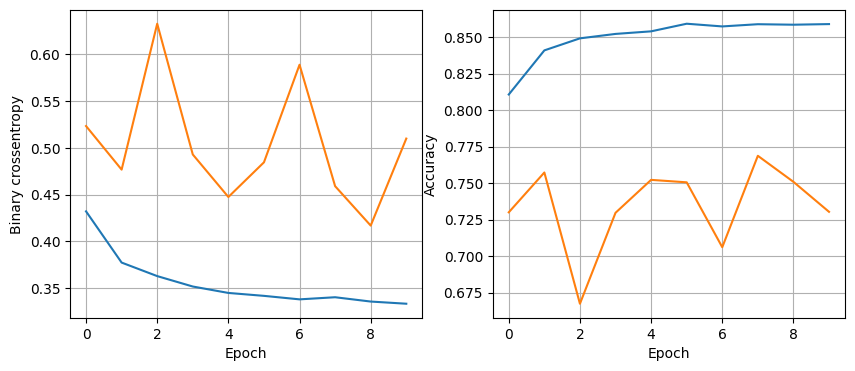

119/119 [==============================] - 0s 362us/step - loss: 0.3162 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.005, batch size 64


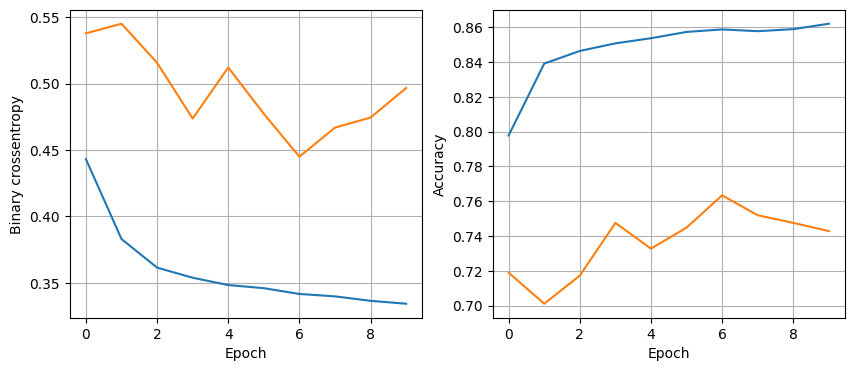

119/119 [==============================] - 0s 358us/step - loss: 0.3138 - accuracy: 0.8699
32 nodes, dropout 0.2, lr 0.005, batch size 128


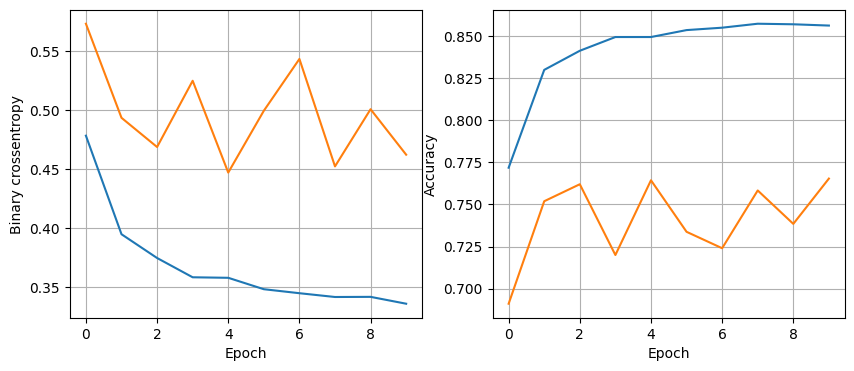

119/119 [==============================] - 0s 387us/step - loss: 0.3184 - accuracy: 0.8644
32 nodes, dropout 0.2, lr 0.001, batch size 32


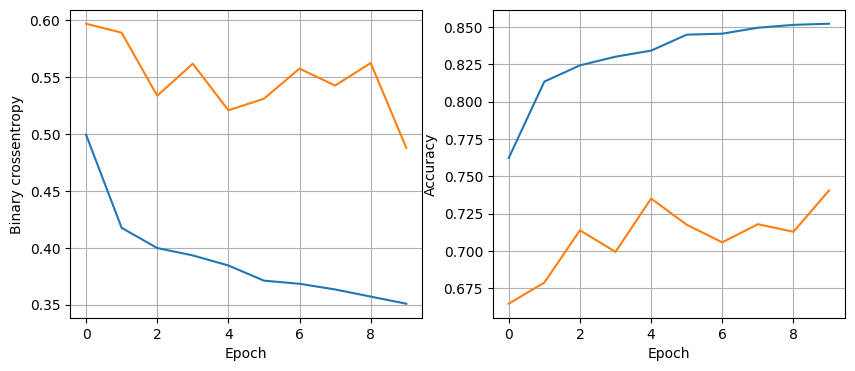

119/119 [==============================] - 0s 391us/step - loss: 0.3232 - accuracy: 0.8636
32 nodes, dropout 0.2, lr 0.001, batch size 64


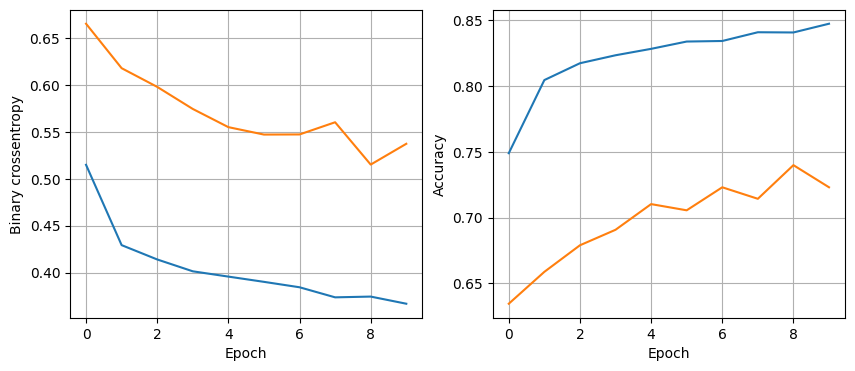

119/119 [==============================] - 0s 358us/step - loss: 0.3307 - accuracy: 0.8633
32 nodes, dropout 0.2, lr 0.001, batch size 128


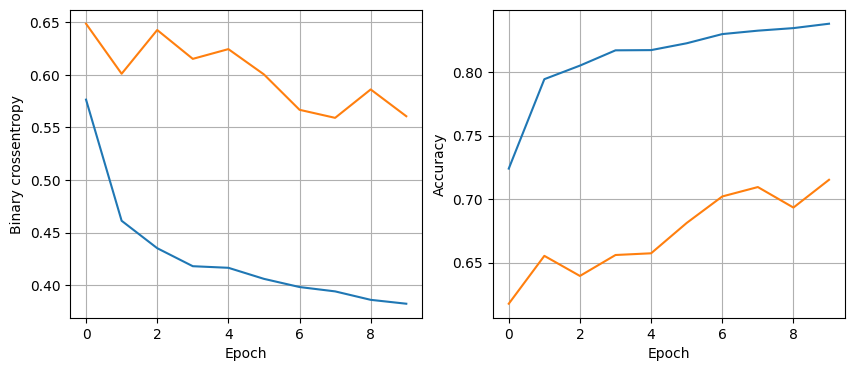

119/119 [==============================] - 0s 370us/step - loss: 0.3458 - accuracy: 0.8586
64 nodes, dropout 0, lr 0.01, batch size 32


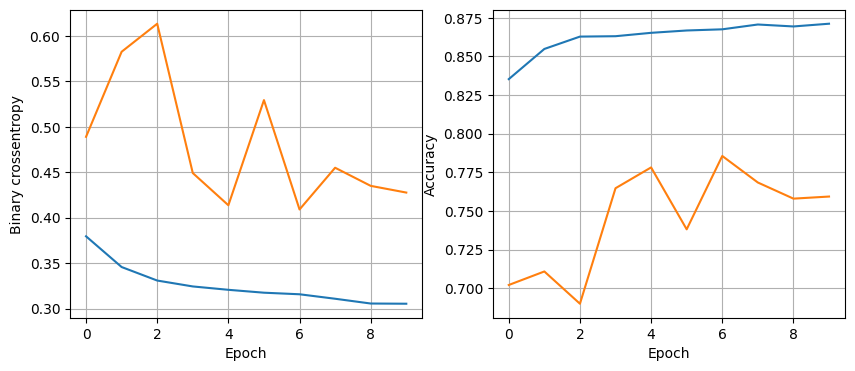

119/119 [==============================] - 0s 400us/step - loss: 0.3159 - accuracy: 0.8762
64 nodes, dropout 0, lr 0.01, batch size 64


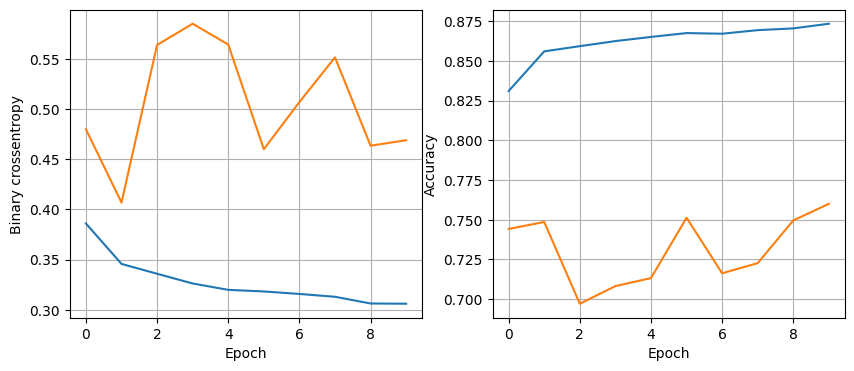

119/119 [==============================] - 0s 366us/step - loss: 0.3066 - accuracy: 0.8759
64 nodes, dropout 0, lr 0.01, batch size 128


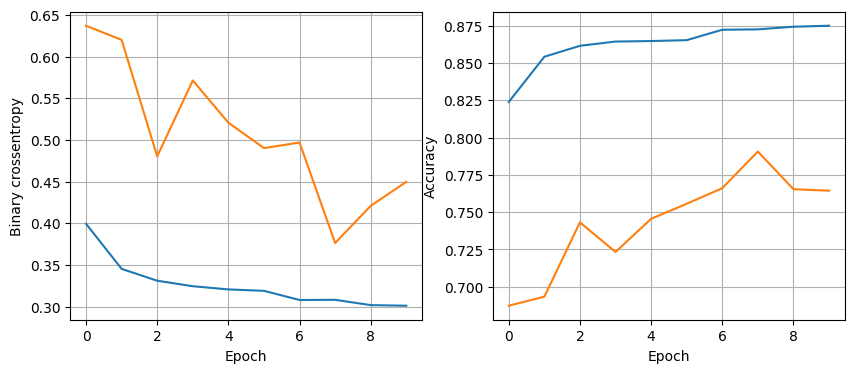

119/119 [==============================] - 0s 387us/step - loss: 0.3143 - accuracy: 0.8717
64 nodes, dropout 0, lr 0.005, batch size 32


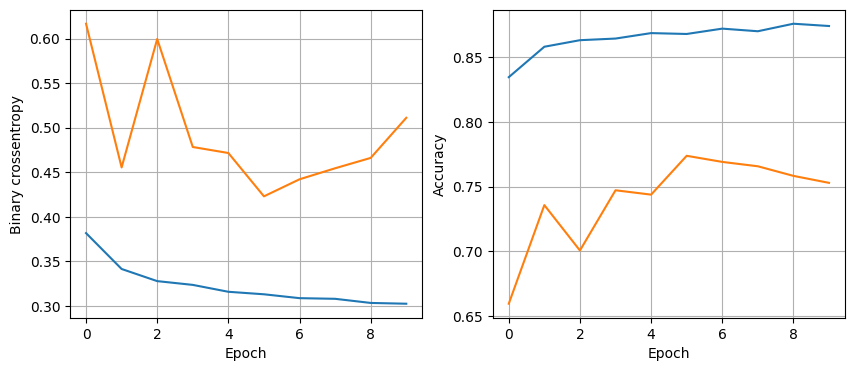

119/119 [==============================] - 0s 370us/step - loss: 0.3079 - accuracy: 0.8725
64 nodes, dropout 0, lr 0.005, batch size 64


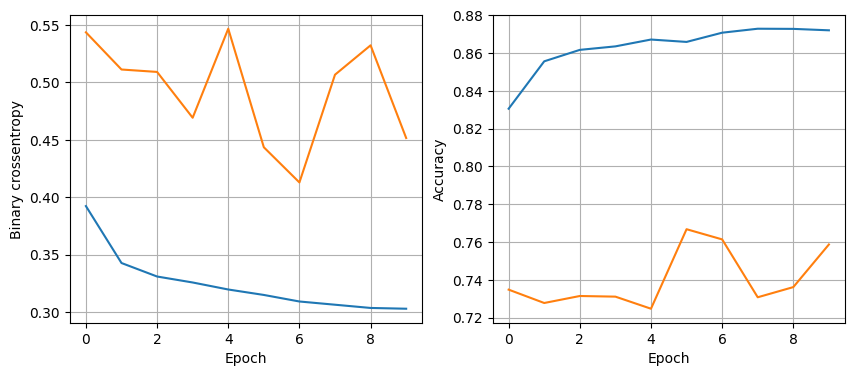

119/119 [==============================] - 0s 387us/step - loss: 0.3098 - accuracy: 0.8691
64 nodes, dropout 0, lr 0.005, batch size 128


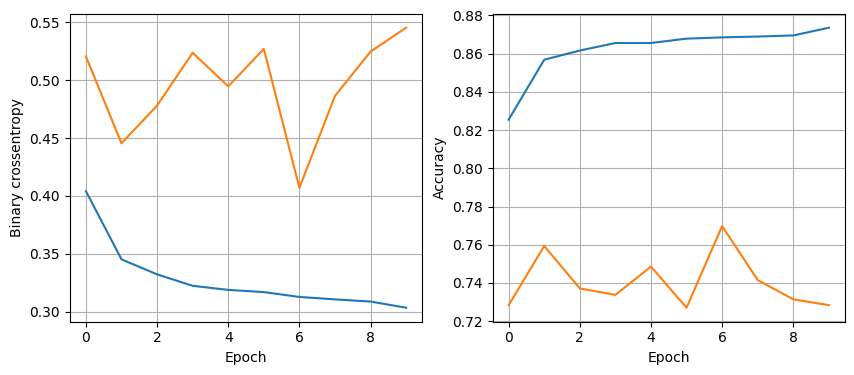

119/119 [==============================] - 0s 370us/step - loss: 0.3095 - accuracy: 0.8754
64 nodes, dropout 0, lr 0.001, batch size 32


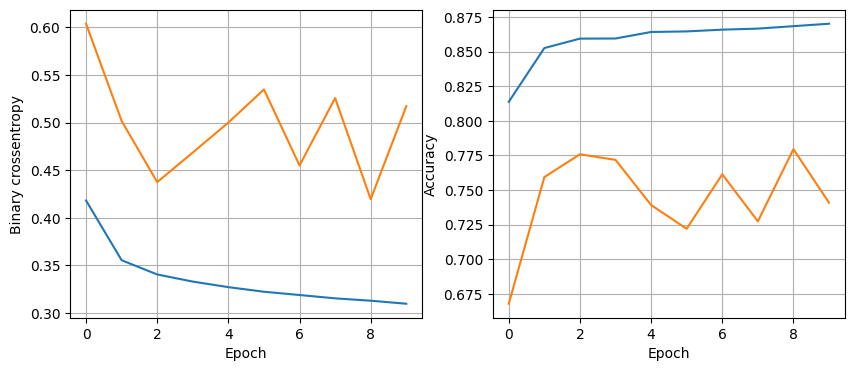

119/119 [==============================] - 0s 366us/step - loss: 0.3081 - accuracy: 0.8715
64 nodes, dropout 0, lr 0.001, batch size 64


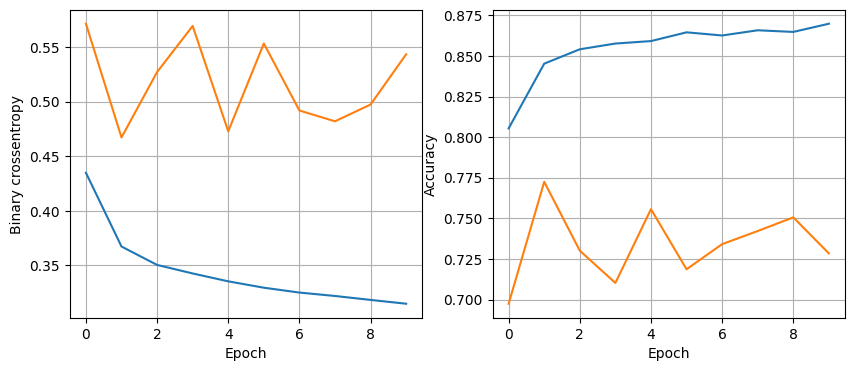

119/119 [==============================] - 0s 379us/step - loss: 0.3174 - accuracy: 0.8701
64 nodes, dropout 0, lr 0.001, batch size 128


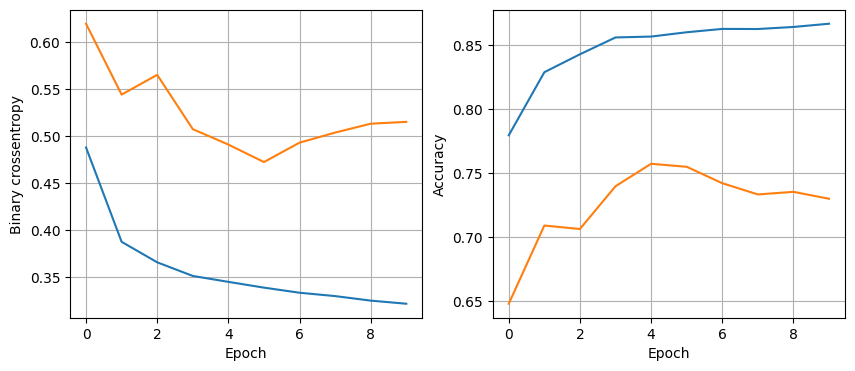

119/119 [==============================] - 0s 370us/step - loss: 0.3169 - accuracy: 0.8715
64 nodes, dropout 0.2, lr 0.01, batch size 32


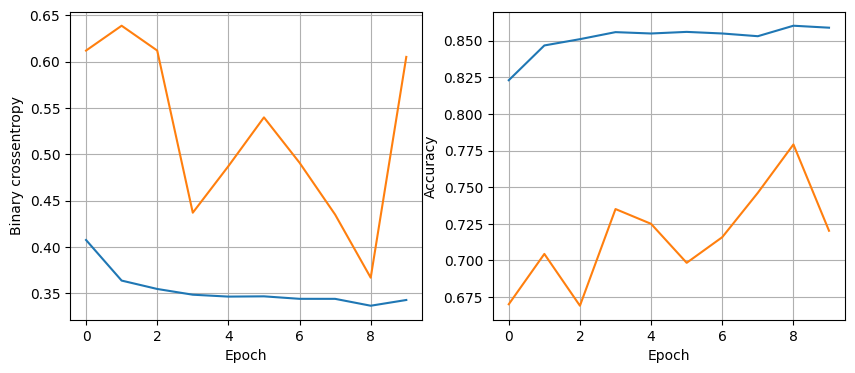

119/119 [==============================] - 0s 371us/step - loss: 0.3194 - accuracy: 0.8704
64 nodes, dropout 0.2, lr 0.01, batch size 64


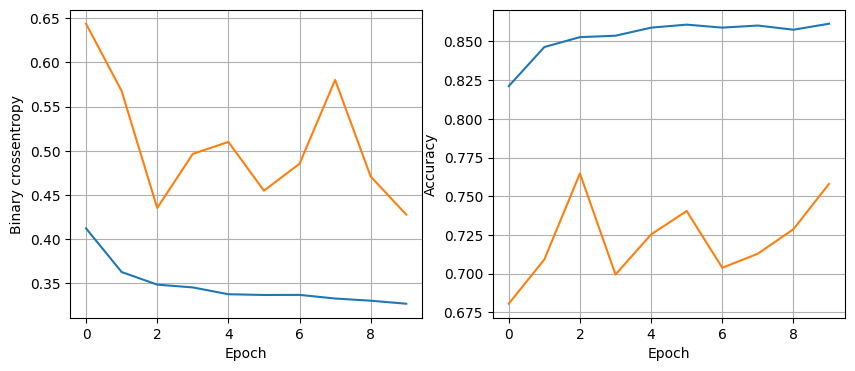

119/119 [==============================] - 0s 379us/step - loss: 0.3111 - accuracy: 0.8743
64 nodes, dropout 0.2, lr 0.01, batch size 128


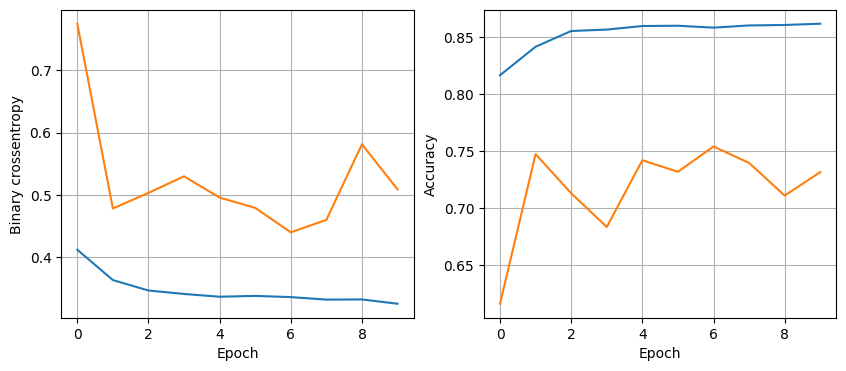

119/119 [==============================] - 0s 391us/step - loss: 0.3130 - accuracy: 0.8733
64 nodes, dropout 0.2, lr 0.005, batch size 32


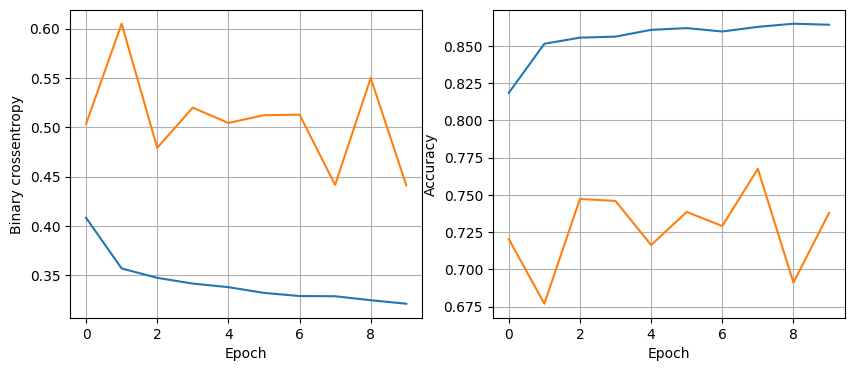

119/119 [==============================] - 0s 398us/step - loss: 0.3222 - accuracy: 0.8665
64 nodes, dropout 0.2, lr 0.005, batch size 64


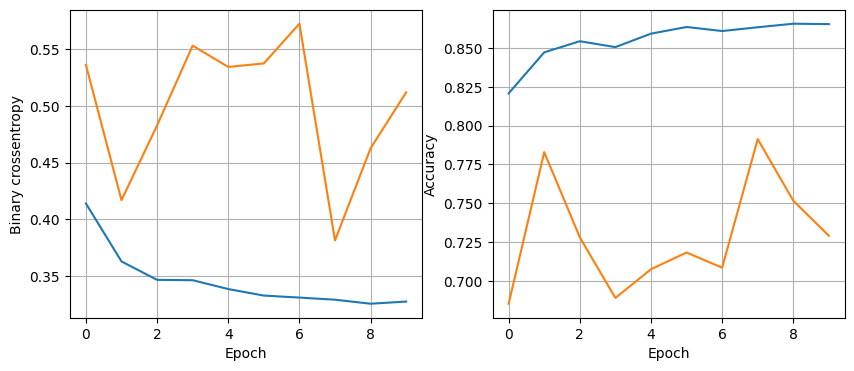

119/119 [==============================] - 0s 505us/step - loss: 0.3104 - accuracy: 0.8712
64 nodes, dropout 0.2, lr 0.005, batch size 128


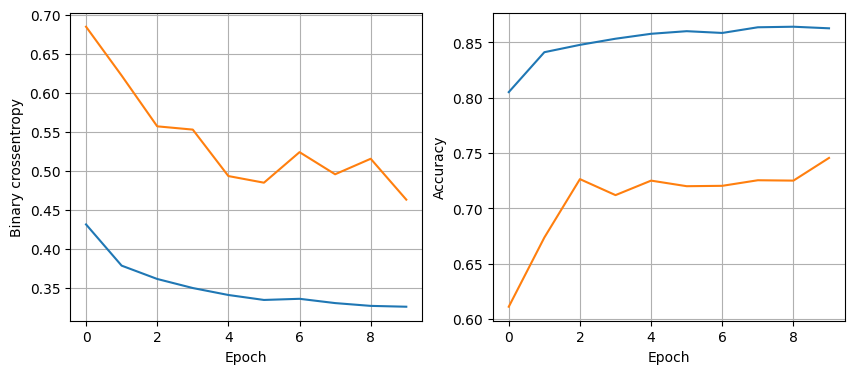

119/119 [==============================] - 0s 417us/step - loss: 0.3100 - accuracy: 0.8754
64 nodes, dropout 0.2, lr 0.001, batch size 32


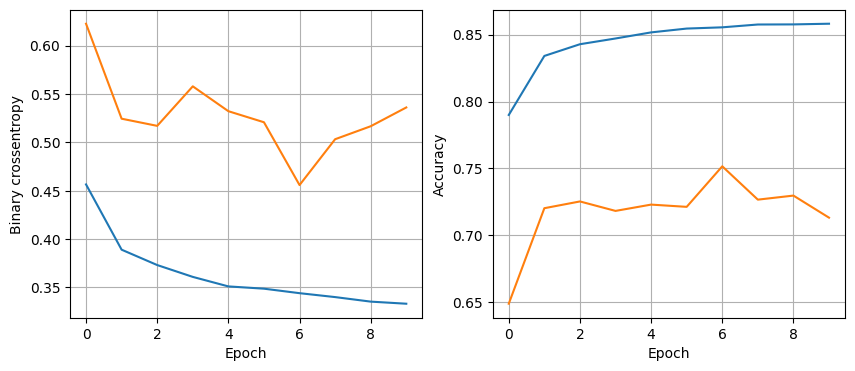

119/119 [==============================] - 0s 349us/step - loss: 0.3117 - accuracy: 0.8696
64 nodes, dropout 0.2, lr 0.001, batch size 64


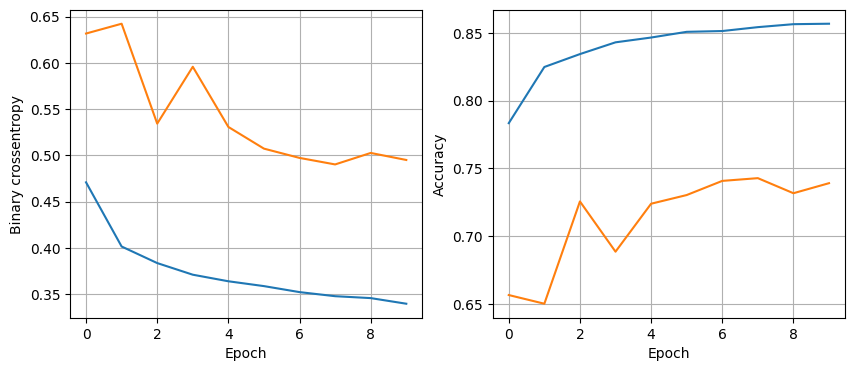

119/119 [==============================] - 0s 366us/step - loss: 0.3179 - accuracy: 0.8691
64 nodes, dropout 0.2, lr 0.001, batch size 128


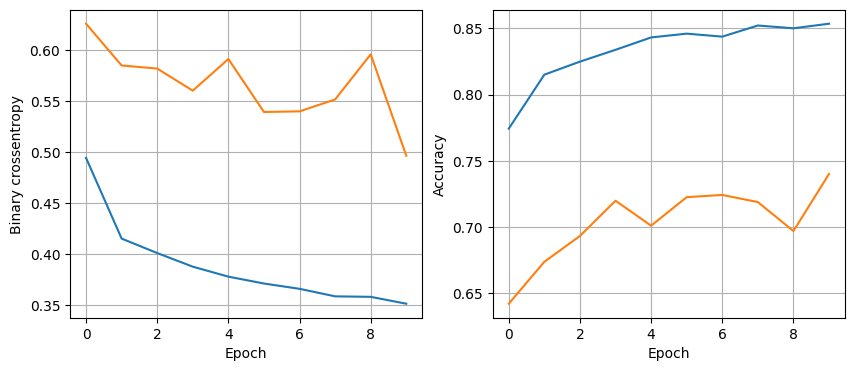

119/119 [==============================] - 0s 362us/step - loss: 0.3265 - accuracy: 0.8646


In [35]:
least_val_loss = float('inf')
least_loss_model = None
epochs=10
for num_nodes in [16, 32, 64]:
    for dropout_prob in[0, 0.2]:   #the probability of dropping out some of the data
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_val, y_val)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model #with these two lines we store the best model

In [36]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1357
           1       0.87      0.94      0.90      2447

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

